In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from pycatch22 import catch22_all
import scipy.ndimage as ndimage
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import palettable
from pathlib import Path

In [8]:
home = Path('R:/home')
home = Path.home()
date = '20220617'
if 'ys5320' in str(home):
    top_dir = Path(Path.home(), "firefly_link/cancer")

else:
    top_dir = Path('R:/home/firefly_link/cancer')

save_dir = Path(top_dir, "analysis", "full")
#initial_df = pd.read_csv(Path(top_dir, 'analysis', 'correct_dataframes', f'long_acqs_{date}_HPC_labelled_complete.csv'))


df = pd.read_csv(
    Path(
        save_dir,
        "20220423_original_and_review_intermediate_files/20220423_original_and_review_non_ttx_active_df_by_cell.csv",
    )
)

df2 = pd.read_csv(
    Path(
        save_dir,
        "20220423_original_and_review_intermediate_files/20220423_original_and_review_TTX_active_df_by_cell.csv",
    )
)
df2 = df2[df2.stage == "pre"]

df3 = pd.read_csv(
    Path(
        save_dir,
        "long_acqs_20220420_HPC_labelled_complete_intermediate_files/long_acqs_20220420_HPC_labelled_complete_non_ttx_active_df_by_cell.csv",
    )
)

df4 = pd.read_csv(
    Path(
        save_dir,
        "long_acqs_20220808_HPC_labelled_complete_intermediate_files/long_acqs_20220808_HPC_labelled_complete_non_ttx_active_df_by_cell.csv",
    )
)

df = pd.concat([df, df2, df3, df4])
df.expt = [x[1:] if x[0] == 'L' else x for x in df.expt]
'''
df = pd.read_csv(
    Path(
        save_dir,
        f"long_acqs_{date}_HPC_labelled_complete_intermediate_files/long_acqs_{date}_HPC_labelled_complete_non_ttx_active_df_by_cell.csv",
    )
)
'''

df["exp_stage"] = df.expt + "_" + df.stage
#print(df.exp_stage.unique())
MDA_keys = [
    "standard_none",
    "TTX_10um_pre",
    "TTX_10um_washout_pre",
    "TTX_1um_pre",
    "231_none"
]
TGFB_keys = [
    'MCF10A_TGFB_none',
    'MCF10A_TGFB_0314_none',
    'MCF10A_TGFB_0304_none'
]

#df.exp_stage = [x if x not in MDA_keys else "231_none" for x in df.exp_stage]
df.exp_stage = [x if x not in MDA_keys and x not in TGFB_keys else "231_none" if x in MDA_keys else 'MCF10A_TGFB_none' for x in df.exp_stage]

lines = list(np.unique(df.exp_stage))
print(lines)
event_df = df[(df.integrated_events != 0)]
#lines = [x[:-5] for x in lines]
per = []
li = ['MCF10A_none','MCF10A_TGFB_none','T47D_none','BT474_none','453_none','468_none','Cal51_none','SUM159_none','231_none','Hs578t_none']

trial_save = Path(save_dir, 'ratio_stacks')
for l in li:
    print(l)
    l_df = event_df[event_df.exp_stage == l]
    all_df = df[df.exp_stage == l]
    per.append(l_df.shape[0]/all_df.shape[0])
    #li.append(l[:-5])
per = pd.DataFrame(per)
per

['231_none', '453_none', '468_none', 'BT474_none', 'Cal51_none', 'Hs578t_none', 'MCF10A_TGFB_none', 'MCF10A_none', 'SUM159_none', 'T47D_none', 'chtx_post', 'chtx_pre', 'chtx_washout', 'dmso_post', 'dmso_pre', 'wm_none']
MCF10A_none
MCF10A_TGFB_none
T47D_none
BT474_none
453_none
468_none
Cal51_none
SUM159_none
231_none
Hs578t_none


,0
0,0.004896
1,0.007941
2,0.071265
3,0.174260
4,0.383178
5,0.206250
6,0.011725
7,0.012397
8,0.066751
9,0.021207


Text(0.5, 1.0, 'Percentage of all active cells')

<Figure size 1800x1200 with 0 Axes>

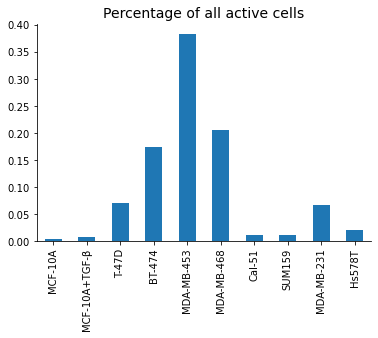

In [9]:
per.index = ['MCF-10A','MCF-10A+TGF-\u03B2','T-47D','BT-474','MDA-MB-453','MDA-MB-468','Cal-51','SUM159','MDA-MB-231','Hs578T']
per.columns = ['Active cells %']
per

import seaborn as sns
plt.figure(dpi = 300)
per.plot(kind = 'bar')
sns.despine()
plt.legend('',frameon=False)
plt.title('Percentage of all active cells', fontsize = 14)

In [12]:
figsave = Path(r'C:\Users\Firefly\Desktop\breast_cancer_figure')
#per.to_csv(Path(figsave, 'active_cells_%.csv'))

MCF10A_none
MCF10A_TGFB_none
T47D_none
BT474_none
453_none
468_none
Cal51_none
SUM159_none
231_none
Hs578t_none


Text(0.5, 1.0, 'Percentage of negatively active cells')

<Figure size 1800x1200 with 0 Axes>

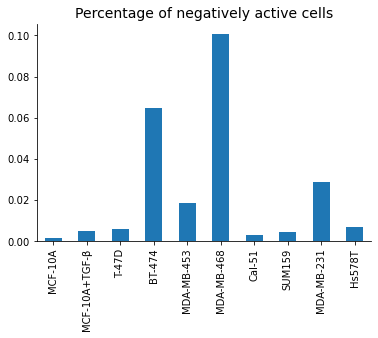

In [6]:
event_df = df[(df.neg_integrated_events != 0) & (df.n_pos_events == 0)]
#lines = [x[:-5] for x in lines]
per = []
li = ['MCF10A_none','MCF10A_TGFB_none','T47D_none','BT474_none','453_none','468_none','Cal51_none','SUM159_none','231_none','Hs578t_none']

trial_save = Path(save_dir, 'ratio_stacks')
for l in li:
    print(l)
    l_df = event_df[event_df.exp_stage == l]
    all_df = df[df.exp_stage == l]
    per.append(l_df.shape[0]/all_df.shape[0])
    #li.append(l[:-5])
per = pd.DataFrame(per)
per
per.index = ['MCF-10A','MCF-10A+TGF-\u03B2','T-47D','BT-474','MDA-MB-453','MDA-MB-468','Cal-51','SUM159','MDA-MB-231','Hs578T']
per.columns = ['Active cells %']
per

import seaborn as sns
plt.figure(dpi = 300)
per.plot(kind = 'bar')
sns.despine()
plt.legend('',frameon=False)
plt.title('Percentage of negatively active cells', fontsize = 14)

MCF10A_none
T47D_none
BT474_none
453_none
468_none
Cal51_none
SUM159_none
231_none
Hs578t_none
wm_none


Text(0.5, 1.0, 'Percentage of positively active cells')

<Figure size 1800x1200 with 0 Axes>

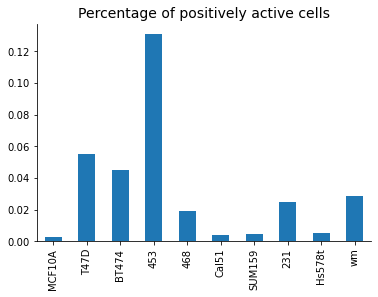

In [43]:
event_df = df[(df.n_pos_events != 0) & (df.n_neg_events == 0)]
#lines = [x[:-5] for x in lines]
per = []
li = ['MCF10A_none','T47D_none','BT474_none','453_none','468_none','Cal51_none','SUM159_none','231_none','Hs578t_none','wm_none']

trial_save = Path(save_dir, 'ratio_stacks')
for l in li:
    print(l)
    l_df = event_df[event_df.exp_stage == l]
    all_df = df[df.exp_stage == l]
    per.append(l_df.shape[0]/all_df.shape[0])
    #li.append(l[:-5])
per = pd.DataFrame(per)
per
per.index = [x[:-5] for x in li]
per.columns = ['Active cells %']
per

import seaborn as sns
plt.figure(dpi = 300)
per.plot(kind = 'bar')
sns.despine()
plt.legend('',frameon=False)
plt.title('Percentage of positively active cells', fontsize = 14)

MCF10A_none
T47D_none
BT474_none
453_none
468_none
Cal51_none
SUM159_none
231_none
Hs578t_none
wm_none


Text(0.5, 1.0, 'Percentage of positively active cells')

<Figure size 1800x1200 with 0 Axes>

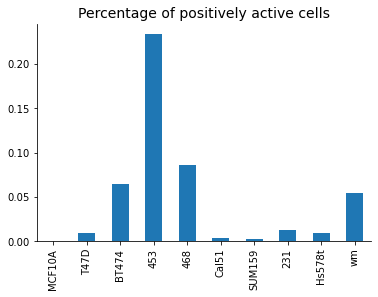

In [45]:
event_df = df[(df.n_pos_events != 0) & (df.n_neg_events != 0)]
#lines = [x[:-5] for x in lines]
per = []
li = ['MCF10A_none','T47D_none','BT474_none','453_none','468_none','Cal51_none','SUM159_none','231_none','Hs578t_none','wm_none']

trial_save = Path(save_dir, 'ratio_stacks')
for l in li:
    print(l)
    l_df = event_df[event_df.exp_stage == l]
    all_df = df[df.exp_stage == l]
    per.append(l_df.shape[0]/all_df.shape[0])
    #li.append(l[:-5])
per = pd.DataFrame(per)
per
per.index = [x[:-5] for x in li]
per.columns = ['Active cells %']
per

import seaborn as sns
plt.figure(dpi = 300)
per.plot(kind = 'bar')
sns.despine()
plt.legend('',frameon=False)
plt.title('Percentage of positively active cells', fontsize = 14)